# Digit Recognition 

In [1]:
# MNIST dataset downloaded from Kaggle:
# https://www.kaggle.com/c/digit-recognizer/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [2]:
train_data = pd.read_csv('train.csv')
print(train_data.head(5)) # print the first five rows of train_data

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [3]:
# save the lebels into a variable l
labels = train_data['label']

# drop the label feature and store the pixel data in d
data = train_data.drop(['label'], axis=1)

print(data.shape)
print(labels.shape)

(42000, 784)
(42000,)


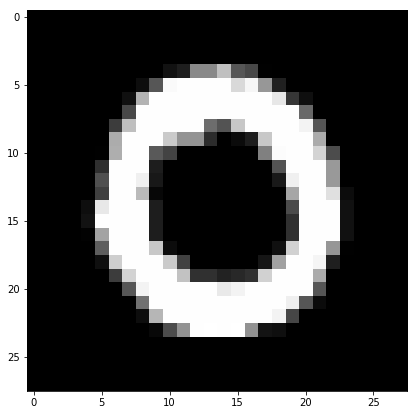

0


In [4]:
# display or plot a number
plt.figure(figsize=(7,7))
index = 1

grid_data = data.iloc[index].values.reshape(28, 28) # reshape from 1d to 2d
plt.imshow(grid_data, interpolation = "none", cmap = "gray") # cmap stands for color map
plt.show()

print(labels[index])

# 2D Visulization using PCA

In [5]:
# Data -preprocessing: Standardizing the data

standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

C:\ProgramData\Anaconda3\envs\Python3.6\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\Python3.6\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(42000, 784)


In [6]:
# find the co-variance matrix which is : A^T = A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T, sample_data)

print('The shape covariance matrix =', covar_matrix.shape)

The shape covariance matrix = (784, 784)


In [7]:
# finding the top two eigen-values and corresponding eigen-vectors for projecting into a 2D space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code generates only the top 2 (782, 783) eigen values
values, vectors = eigh(covar_matrix, eigvals=(782, 783))

print('Shape of eigen vectors =', vectors.shape)

# converting the eigen vectors into 2D shape for easyness of further computation
vectors = vectors.T

print('Update shape of eigen vectors =', vectors.shape)
# here the vectors[1] represent the eigen vector corresponding to the 1st principal
# here the vectors[2] represent the eigen vector corresponding to the 2nd principal

Shape of eigen vectors = (784, 2)
Update shape of eigen vectors = (2, 784)


In [8]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)

print('Shape of resultant new data points', vectors.shape, 'X', sample_data.T.shape, '=', new_coordinates.shape)

Shape of resultant new data points (2, 784) X (784, 42000) = (2, 42000)


In [9]:
# appending label to the 2d projected data
final_coordinates = np.vstack((new_coordinates, labels)).T
    
# creating a new data frame for ploting the labeled points
dataframe = pd.DataFrame(data=final_coordinates, columns=('1st_principal', '2nd_principal', 'label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


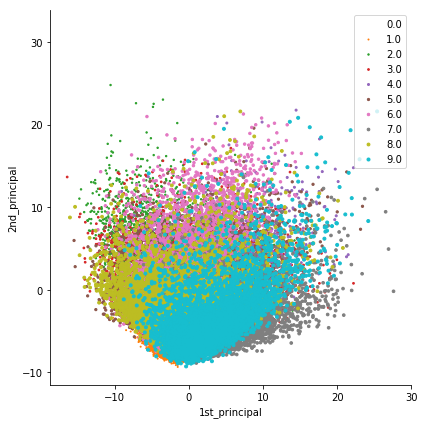

In [10]:
#plotting the 2D data points with seaborn

sn.FacetGrid(dataframe, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', 'label')
plt.legend()
plt.show()

# PCA using Scikit-Learn

In [11]:
# initializing the PCA

from sklearn import decomposition
pca = decomposition.PCA()

In [12]:
# configuration the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2D projects of simple data
print('Shape of pca_reduced.shape =', labels.T.shape)

Shape of pca_reduced.shape = (42000,)


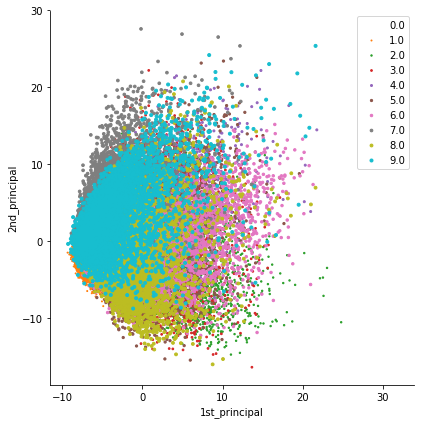

In [12]:
# attaching the label for each 2D data point
final_pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data frame which help us in plotting the result data
pca_df = pd.DataFrame(data=final_pca_data, columns=('1st_principal', '2nd_principal', 'label'))
sn.FacetGrid(pca_df, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal', 'label')
plt.legend()
plt.show()

# PCA for dimensionality reduction (non-visualization)

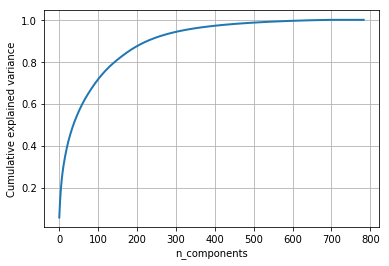

In [13]:
# PCA for dimensionality reduction (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained) # taking cumulative sum of percentage_var_explained

# plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.show()

# t-SNE using Scikit-Learn

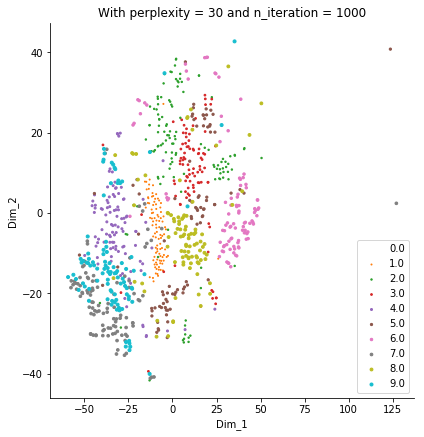

In [13]:
#t-SNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 42K points
data = standardized_data[:1000]
new_labels = labels[:1000]

model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learing rate = 200
# default maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)

# creating a new data frame which help us in plotting the result data
final_tsne_data = np.vstack((tsne_data.T, new_labels)).T
tsne_df = pd.DataFrame(data=final_tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# ploting the result of t-sne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2', 'label')
plt.title('With perplexity = 30 and n_iteration = 1000')
plt.legend()
plt.show()

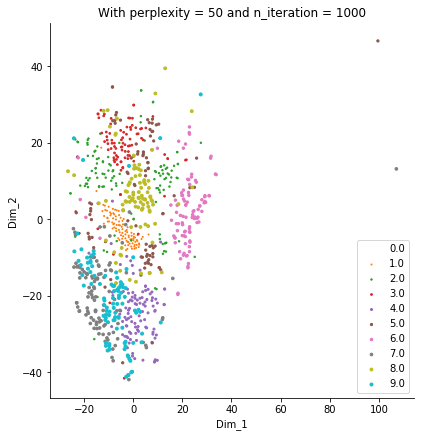

In [14]:
# for 1K data points 

model = TSNE(n_components=2, random_state=0, perplexity = 50)
# configuring the parameteres
# the number of components = 2
# default learing rate = 200
# default maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data)

# creating a new data frame which help us in plotting the result data
final_tsne_data = np.vstack((tsne_data.T, new_labels)).T
tsne_df = pd.DataFrame(data=final_tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# ploting the result of t-sne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2', 'label')
plt.title('With perplexity = 50 and n_iteration = 1000')
plt.legend()
plt.show()

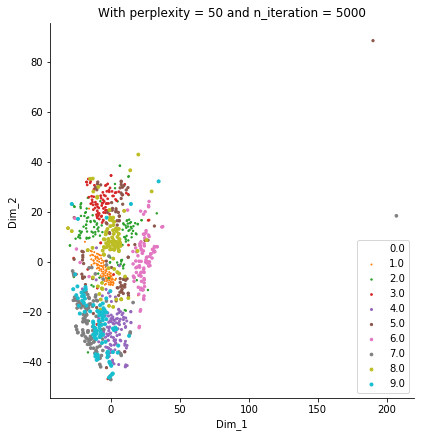

In [20]:
# for 1K data points 

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
# configuring the parameteres
# the number of components = 2
# default learing rate = 200

tsne_data = model.fit_transform(data)

# creating a new data frame which help us in plotting the result data
final_tsne_data = np.vstack((tsne_data.T, new_labels)).T
tsne_df = pd.DataFrame(data=final_tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# ploting the result of t-sne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2', 'label')
#sn.lmplot('Dim_1', 'Dim_2', tsne_df, hue='label', height=6, scatter_kws={"s": 50}, fit_reg=False)
plt.title('With perplexity = 50 and n_iteration = 5000')
plt.legend()
plt.show()

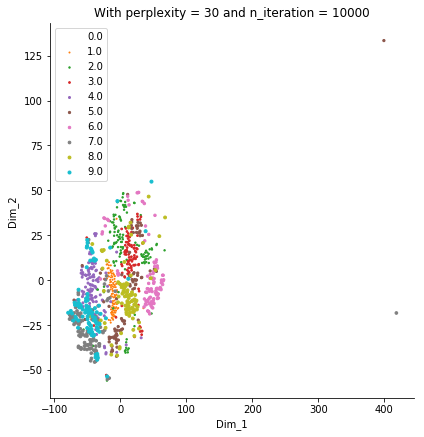

In [19]:
# for 1K data points 

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=10000)
# configuring the parameteres
# the number of components = 2
# default learing rate = 200

tsne_data = model.fit_transform(data)

# creating a new data frame which help us in plotting the result data
final_tsne_data = np.vstack((tsne_data.T, new_labels)).T
tsne_df = pd.DataFrame(data=final_tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# ploting the result of t-sne
sn.FacetGrid(tsne_df, hue='label', height=6).map(plt.scatter, 'Dim_1', 'Dim_2', 'label')
plt.title('With perplexity = 30 and n_iteration = 10000')
plt.legend()
plt.show()

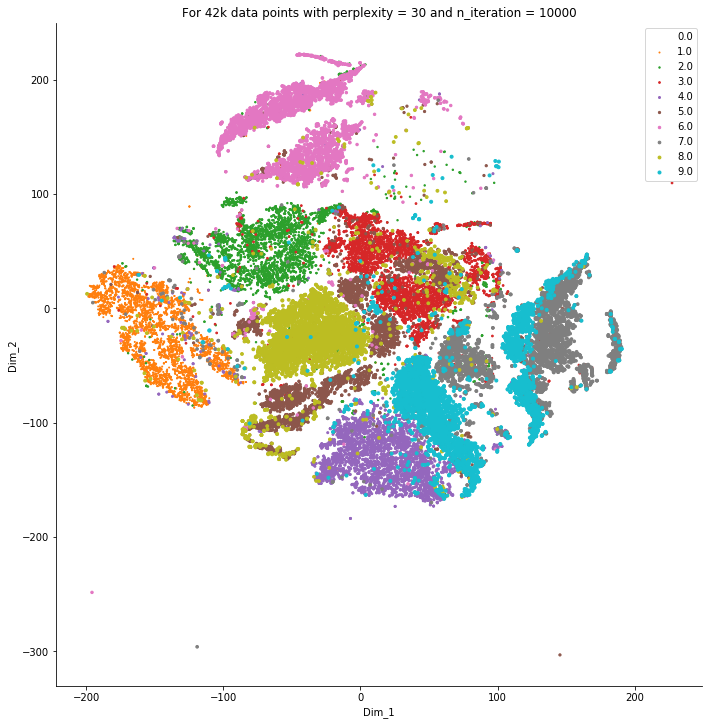

In [23]:
# for 42K data points

model = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=10000)
# configuring the parameteres
# the number of components = 2
# default learing rate = 200

tsne_data = model.fit_transform(standardized_data)

# creating a new data frame which help us in plotting the result data
final_tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=final_tsne_data, columns=('Dim_1', 'Dim_2', 'label'))

# ploting the result of t-sne
sn.FacetGrid(tsne_df, hue='label', height=10).map(plt.scatter, 'Dim_1', 'Dim_2', 'label')
plt.title('For 42k data points with perplexity = 30 and n_iteration = 10000')
plt.legend()
plt.show()